## Pre-Task: Environment Setup and Data Loading

In [ ]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

## Iris Classification
We will explore some foundational machine learning techniques focused on classification tasks. Through this notebook, you will gain hands-on experience in building, evaluating, and optimizing models that can make predictions from data.

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

### Task 1. Complete the code below to split the dataset into training and test sets.
Please follow the instructions following:
1. Use the train_test_split function from the sklearn.model_selection module to perform the split. 
2. Allocate 80% of the data to the training set and 20% to the test set. 
3. Use a random state of 42 to ensure reproducibility.

In [5]:

X_train, X_test, y_train, y_test = # please split data into training and test sets

# View some data points
print("Data shape:", X.shape)
print("Sample data point:", X[0])

Data shape: (569, 30)
Sample data point: [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]



We will delve into three popular machine learning models:

1. Decision Tree Classifier: A straightforward yet powerful model that represents decisions and decision-making in a tree-like graph of choices.
2. Random Forest Classifier: An ensemble model that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes of the individual trees. It is known for its high accuracy, robustness, and ease of use.
3. Gradient Boosting Classifier (XGBoost): Another ensemble technique that builds models sequentially, with each new model attempting to correct errors made by the previous ones. It is particularly powerful and flexible, widely used in many winning Kaggle competition entries.

The decision tree model and random forest model are created in the following as examples. 

In [6]:
# Initialize and train a decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predict and evaluate the model
tree_predictions = tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_predictions))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=100)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

Decision Tree Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.9649122807017544


### Task 2: Building Gradient Boosting models
**Please bulid a gradient boosting model with sklearn**
1. Use the GradientBoostingClassifier and set n_estimators=100 and random_state=100.
2. Fit the model on the X_train and y_train datasets.
3. Predict the test set results and calculate the accuracy using the accuracy_score

In [ ]:
# build and train the Gradient Boosting model on X_train and y_train.

# Obtain the predictions from the trained model

# Give the accuracy


### Examples of Hyperparameter Tuning on Decision Tree and Random Forest

In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50]
}

# Create a GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=100), 
                              param_grid=param_grid_dt, 
                              cv=3, verbose=1, scoring='accuracy')

grid_search_dt.fit(X_train, y_train)

# Best parameters and best score
print("Decision Tree - Best Parameters:", grid_search_dt.best_params_)
print("Decision Tree - Best cross-validation score: {:.2f}".format(grid_search_dt.best_score_))

# Evaluate on the test set
best_dt = grid_search_dt.best_estimator_
final_predictions_dt = best_dt.predict(X_test)
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, final_predictions_dt))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Decision Tree - Best Parameters: {'criterion': 'gini', 'max_depth': None}
Decision Tree - Best cross-validation score: 0.93
Tuned Decision Tree Accuracy: 0.9298245614035088


In [9]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30],
}

# Create a GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=100), 
                              param_grid=param_grid_rf, 
                              cv=3, verbose=1, scoring='accuracy')

grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
print("Random Forest - Best Parameters:", grid_search_rf.best_params_)
print("Random Forest - Best cross-validation score: {:.2f}".format(grid_search_rf.best_score_))

# Evaluate on the test set
best_rf = grid_search_rf.best_estimator_
final_predictions_rf = best_rf.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, final_predictions_rf))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Random Forest - Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}
Random Forest - Best cross-validation score: 0.96
Tuned Random Forest Accuracy: 0.9649122807017544


### Task 3. Hyper-parameter tuning on gradient boosting.

Define the parameter grid for gradient boosting, specifying the range of values to explore for each parameter. You are required to vary:
1. **Number of Estimators (n_estimators)**: Explore values of 10, 50, 100, and 200 to determine the optimal number of trees in the model.
2. **Learning Rate (learning_rate)**: Test learning rates of 0.01, 0.1, and 0.2 to control the contribution of each tree.
3. **Maximum Depth (max_depth)**: Vary the tree depth with values of 3, 5, and 10 to find the best balance between model complexity and overfitting.

Also, set up a GridSearchCV object using this parameter grid to automate the process of finding the best model parameters.

In [ ]:
# Define parameter grid for Gradient Boosting
param_grid_gb = 

# Create a GridSearchCV object for Gradient Boosting
grid_search_gb = 

grid_search_gb.fit(X_train, y_train)

# Best parameters and best score
print("Gradient Boosting - Best Parameters:", grid_search_gb.best_params_)
print("Gradient Boosting - Best cross-validation score: {:.2f}".format(grid_search_gb.best_score_))

# Evaluate on the test set
best_gb = grid_search_gb.best_estimator_
final_predictions_gb = best_gb.predict(X_test)
print("Tuned Gradient Boosting Accuracy:", accuracy_score(y_test, final_predictions_gb))

## Multi-Layer Perceptron (MLP) on the Digits Dataset

<Figure size 640x480 with 0 Axes>

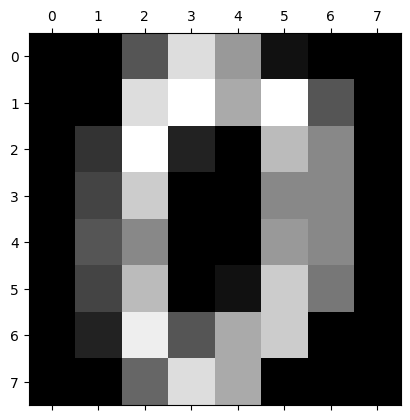

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
digits = load_digits()
X = digits.data
y = digits.target

# Visualize the first digit
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### Build the MLP Model

In [12]:
# Initialize the MLPClassifier
mlp_model = MLPClassifier(random_state=1, max_iter=300)

# Fit the model on training data
mlp_model.fit(X_train, y_train)

# Predict and evaluate the initial model
initial_predictions = mlp_model.predict(X_test)
print("Initial MLP Accuracy:", accuracy_score(y_test, initial_predictions))

Initial MLP Accuracy: 0.9722222222222222


### Task 4. Visualization of the learning curve of MLP

A learning curve is a line plot that shows the decrease of loss over training iterations. Specifically, in the line plot of learning curve:
* Y-Axis (Loss): Represents loss of the model
* X-Axis (Iterations): Shows the number of training cycles the model has completed.

The loss curve data is stored in `mlp_model.loss_curve_`, where `mlp_model.loss_curve_[i]` represents the loss after training i iterations.
**Please complete the code of ploting learning curve following:**

In [15]:
print(len(mlp_model.loss_curve_))

147


In [ ]:

plt.figure(figsize=(8, 4))

#Please complete to code of ploting learning curve.
# TO Complete


plt.title('Learning Curve of MLP')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()